# Test der Netzqualität mittels der Trainingsbilder

Das im ersten Teil erzeugte und gespeicherte Netz wird hier getestet:

0. Vorbereitung (Laden der Bibliotheken und Einstellungen)
1. Laden des neuronalen Netzes
2. Test anhand der Trainingsdaten

### 0) Vorbereitung

##### Modelname
ACHTUNG: hier muss der korrekte Modelname definiert werden, wie er auch im letzten Skript verwendet wurde.

##### Bibliotheken
Laden der notwendigen Bibliotheken.

In [1]:
###############################################################################

ModelNameAndVersion = "dig-s0"

###############################################################################


import matplotlib.pyplot as plt
import glob
import os
from PIL import Image 
import numpy as np

import tensorflow as tf

### 1) Laden des neuronalen Netzes

Mittels der Funktion "load_model" wird das Model geladen und anschließend die Architektur im Überblick nochmals ausgegeben.

In [2]:
model = tf.keras.models.load_model('saved_model/' + ModelNameAndVersion)

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 32, 20, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 20, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 10, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 5, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 2, 64)          0

### 2) Test anhand der Trainingsdaten

Einen guten Eindruck über die Qualität liefert eine Iteration über alle Trainingsbilder. Dazu wird jedes Bild (ACHTUNG: schon in der Zielauflösung) einzeln geladen und durch das neuronale Netz berechnet. SOLL- und IST-Werte werden zum einen in einem Array gespeichert. 

Wenn diese nicht identisch sind, werden die entsprechenden Bilder und die zugehörigen Daten direkt ausgegeben. Das hilft sehr bei der Fehlersuche, denn häufige hat man noch einen Fehler in der Klassifizierung oder erkennt, dass das Bild doch so schlecht ist, dass es besser nicht verwendet werden sollte.

In [3]:
Input_dir='ziffer_resize'
res = []

files = glob.glob(Input_dir + '/*.jpg')

for aktfile in files:
    Dateiname      = os.path.basename(aktfile)    # Dateiname
    Classification_SOLL = Dateiname[0:1]          # Die erste Ziffer entspricht der Zugehörigen Klassifizierung
    if Classification_SOLL == "N":
        Classification_SOLL = 10                  # NaN does not work --> convert to 10
    else:
        Classification_SOLL = int(Classification_SOLL)

    image_in = Image.open(aktfile)
    data = np.array(image_in)
    img = np.reshape(data,[1,32,20,3])
   
    classes = np.argmax(model.predict(img), axis=-1)
    Classification_IST = classes[0]
    
    res.append(np.array([Classification_SOLL, Classification_IST]))
    
    if Classification_SOLL != Classification_IST:
        print("Falsche Erkennung: " + aktfile + " Soll: " + str(Classification_SOLL) +  " IST: " + str(Classification_IST))
        display(image_in)

res = np.asarray(res)

Falsche Erkennung: ziffer_resize\NaN_20200910-012404_ROI5.jpg Soll: 10 IST: 6


Falsche Erkennung: ziffer_resize\NaN_20200910-065522_ROI5.jpg Soll: 10 IST: 5


Falsche Erkennung: ziffer_resize\NaN_6_dig6_20210723-181616.jpg Soll: 10 IST: 6


#### Visualisierung über die gesamten Trainingsbilder

Im vorherigen Schritt wurde für jedes Bild sowohl Soll, wie auch IST-Wert gespeichert. Hier wird über die einzelnen Bilder beide Werte in einem Diagramm dargestellt.

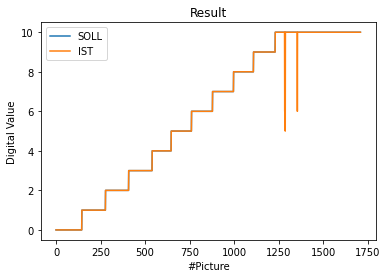

In [4]:
plt.plot(res[:,0])
plt.plot(res[:,1])
plt.title('Result')
plt.ylabel('Digital Value')
plt.xlabel('#Picture')
plt.legend(['SOLL','IST'], loc='upper left')
plt.show()